In [67]:
# Import librabies

# Data Handling
import pandas as pd
import numpy as np 

 # Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train-test split, evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# regression model
from statsmodels.api import OLS, add_constant


# warnings ignore
import warnings
warnings.filterwarnings("ignore") 



## What is EDA
It is the process of exploring and analyzing datasets to Summarize their main characteristics,Visualize patterns,relationships, and distributions,Detect errors, missing values, or outliers,Prepare the data for modeling or decision-making.

### EDA step by step 

 ### Load the Data 

In [68]:
df=pd.read_csv("Housing.csv")

### Veiwing the Data

In [69]:
df.head() # shows first few rows 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [70]:
df.tail() # shows last few rows 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [71]:
df.shape # rows * columns ( size of dataset)

(545, 13)

In [72]:
df.dtypes # Categorical (object) vs Numerical (int/float)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Check the information of the Dataset

In [73]:
df.info() # Gives a quick snapshot of your dataset: size, completeness, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Summarize Basic Statistics 

In [74]:
df.describe() # Gives mean, median, min, max, standard deviation of numerical features. 
              # Helps detect outliers and skewed distribution

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data cleaning

In [75]:
df.isnull().sum() # finding missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [76]:
# Identify numerical Vs categorical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Categorical Columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


### Univariate Analysis

1.Distribution of price

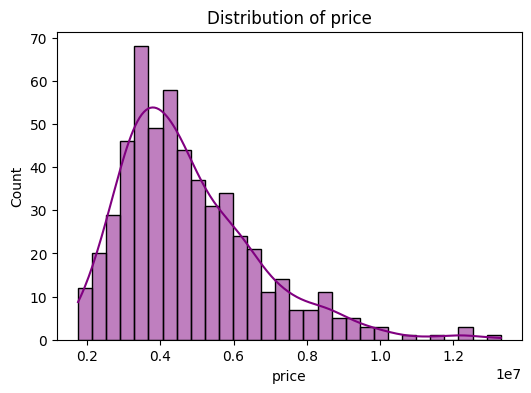

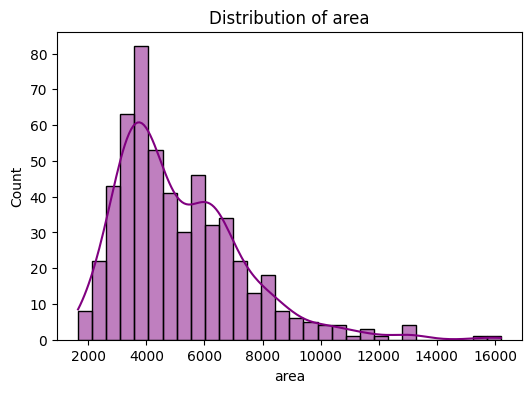

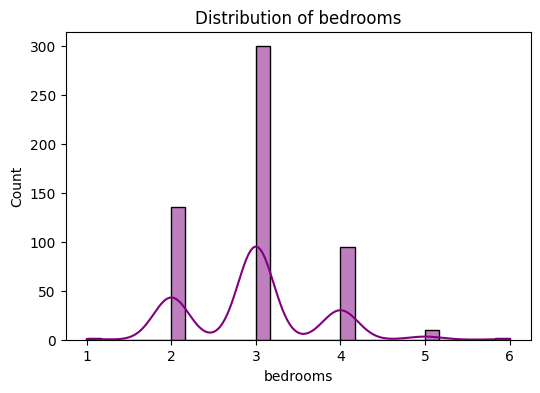

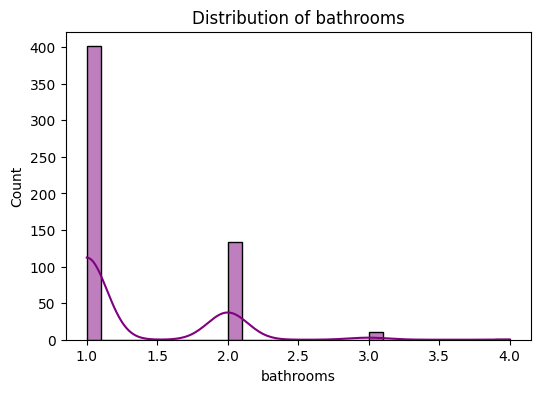

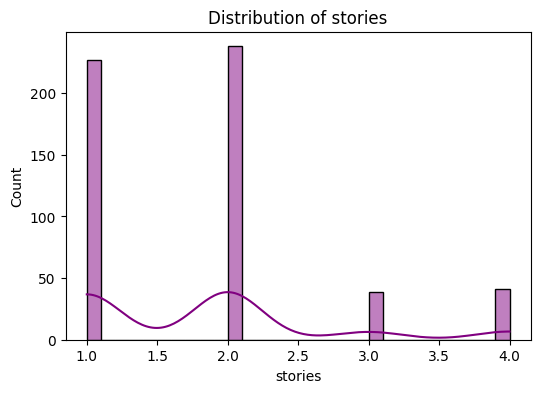

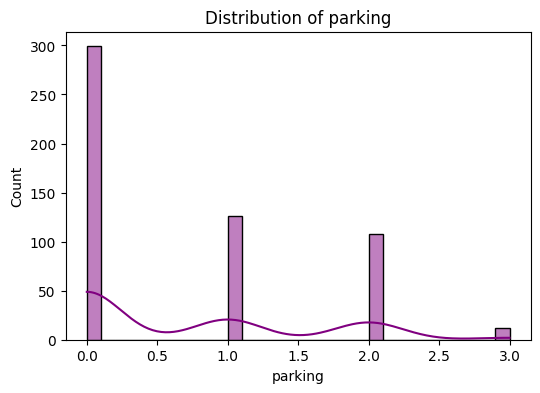

In [77]:
# Histogram 
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Histogram shows the distribution (normal, skewed, or uniform).

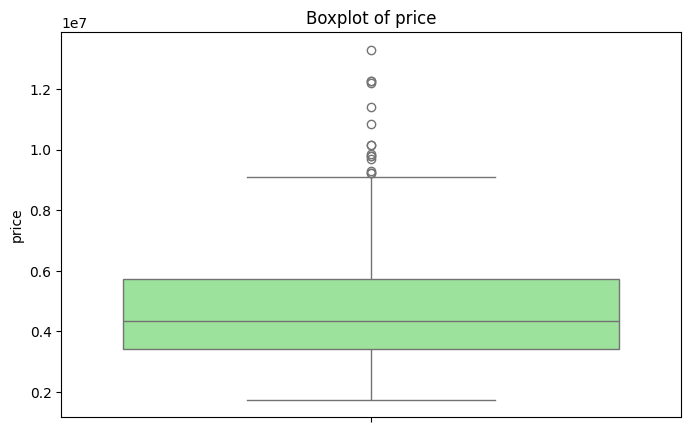

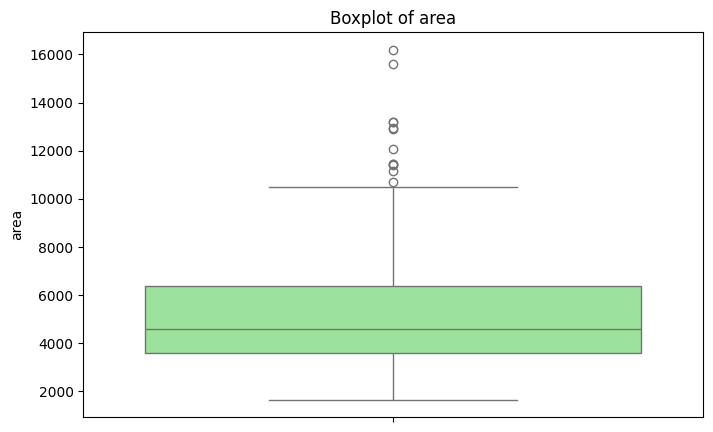

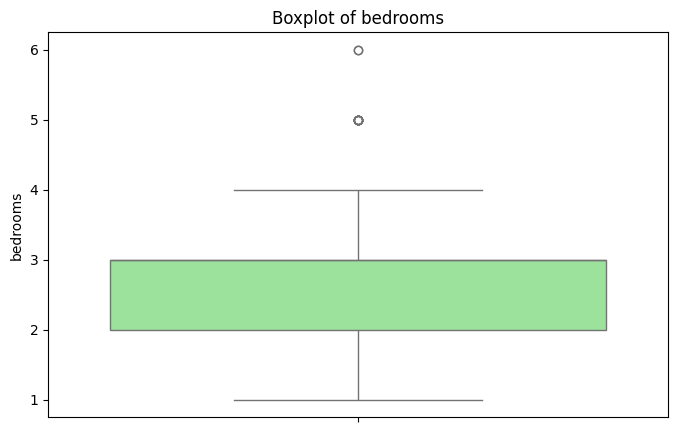

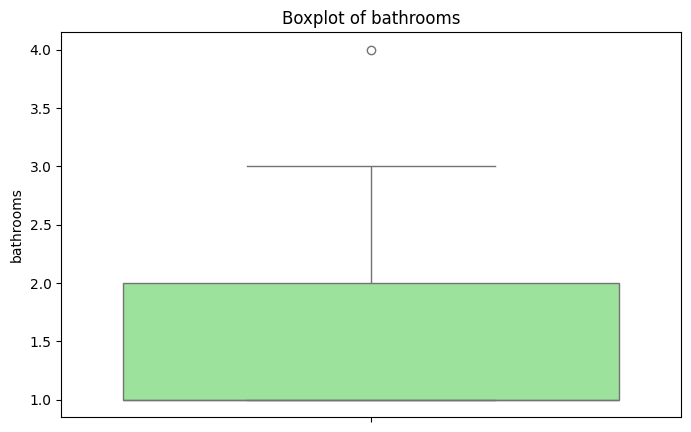

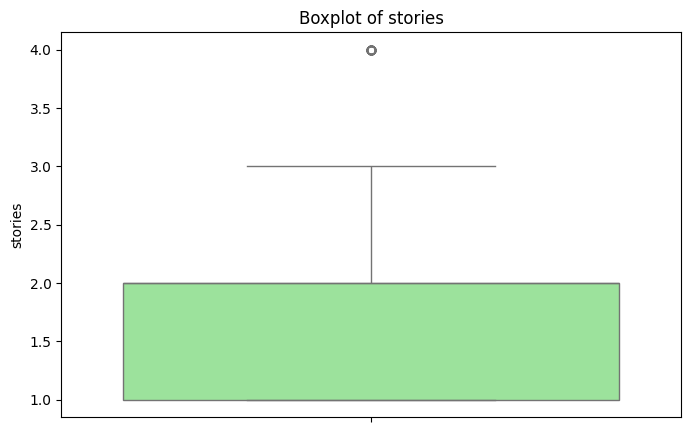

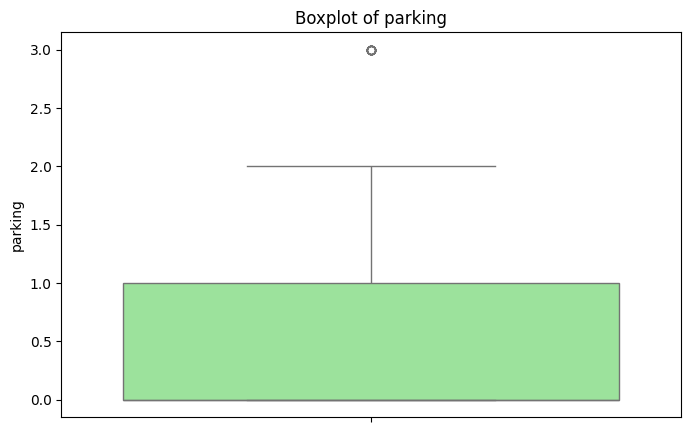

In [78]:
# Boxplot 
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


In [79]:
# Outlier detection using IQR

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
print(f"{col} has {outliers.shape[0]} potential outliers.\n")


parking has 12 potential outliers.



### Correlation Analysis

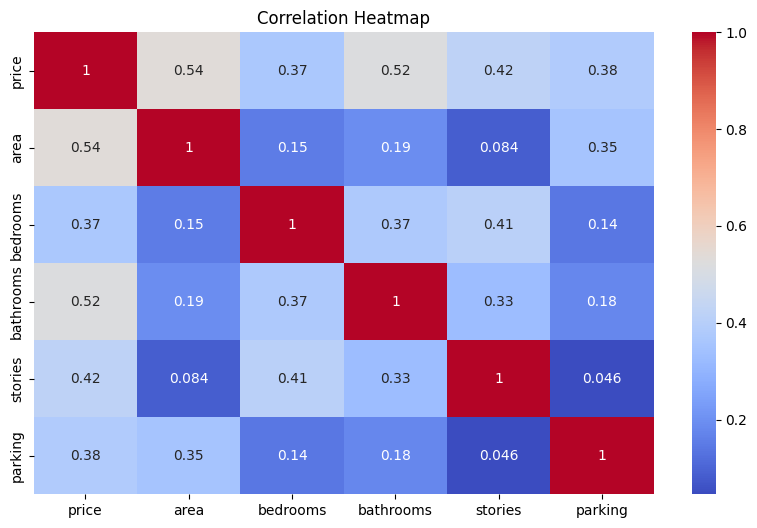

In [80]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identify which features are strongly correlated with target.

This heat map shows how strongly different features (like area, bedrooms, bathrooms, parking, etc.) are related to each other and to price, using values between -1 and 1. A value closer to 1 means a strong positive relationship, while values near 0 mean little or no relationship.

### Feature Engineering

In [81]:
from sklearn.preprocessing import LabelEncoder


In [82]:
# Encode yes/no columns automatically
for col in df.select_dtypes(include='object'):
    if df[col].dropna().isin(['yes','no']).all():
        df[col] = df[col].map({'no':0, 'yes':1})

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


###  Split Data into X and y

In [83]:
target = 'price'
X = df.drop(target, axis=1)  # Features (independent variables)
y = df[target]               # Target (dependent variable)

print("X shape:", X.shape)
print("y shape:", y.shape)




X shape: (545, 13)
y shape: (545,)


### Train test split

In [84]:
# Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% goes to training.
# 20% of data goes to testing.


### Step 11: OLS Regression

In [85]:
print(X_train.dtypes)
print(y_train.dtypes)


area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object
int64


In [86]:
import statsmodels.api as sm
# Add constant column for intercept
X_train_const = sm.add_constant(X_train)

# Convert target and predictors to numpy float arrays
y_train = y_train.astype(float)
X_train_const = X_train_const.astype(float)

# Fit the model
ols_model = sm.OLS(y_train, X_train_const).fit()
# Print a detailed summary table
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           2.16e-97
Time:                        11:46:42   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

1.Model evaluataion 

In [87]:
# --- Prediction on Train Data ---
y_train_pred = ols_model.predict(X_train_const)

# --- Evaluation on Train Data ---
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training Evaluation:")
print(f"R² Score       : {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root MSE (RMSE): {rmse_train:.4f}")

Training Evaluation:
R² Score       : 0.6859
Mean Squared Error (MSE): 968358188440.7244
Root MSE (RMSE): 984051.9237


In [88]:
from joblib import dump, load
import json

# Save the OLS model
dump(ols_model, "ols_model_joblib.pkl")

# Save the feature columns (important for predictions)
with open("model_columns.json", "w") as f:
    json.dump(list(X_train_const.columns), f)

print("✅ Model saved as ols_model_joblib.pkl and columns saved as model_columns.json")


✅ Model saved as ols_model_joblib.pkl and columns saved as model_columns.json
